# Homework 4, problem 5.C1
* Zein Sadek
* ENGR 213
* Due 7/30/19

### Given:
Several concentrated loads Pi , (i=5 1, 2, . . . , n) can be applied to
a beam as shown. Write a computer program that can be used to calculate
the shear, bending moment, and normal stress at any point of the beam
for a given loading of the beam and a given value of its section modulus.
Use this program to solve Probs. 5.18, 5.21, and 5.25. (Hint: Maximum
values will occur at a support or under a load.)

![title](img/5C1pic.png)

Since this problem is asking for n number of point loads and their respective distances we will have to code this problem based around used input.We can begin by asking the user to input the base dimensions for the beam

### Assigning dimensions

In [1]:
import numpy as np

In [2]:
a=int(input('What is the distance between the end of the beam and the first support: '))
l=int(input('What is the distance between the two supports: '))
b=int(input('What is the distence between the second support and the far end of the beam: '))
lt=a+b+l

What is the distance between the end of the beam and the first support: 2
What is the distance between the two supports: 5
What is the distence between the second support and the far end of the beam: 2


### Defining Loads

Now that we have the dimensions for the beam taken care of we can now ask the user to define the number of point loads, the magnitude of each and the respective distance from the end of the beam

In [3]:
n=int(input('How many point loads are applied to this beam: '))
ydirect=[]
loads=np.zeros((n,2))
for i in range(n):
    d = float(input(f"What is the distance of load {i+1} from the left hand side of the beam: "))
    p = float(input(f"What is the manitude of load {i+1}: "))
    loads[i][0]=d
    loads[i][1]=p
    ydirect.append(p)
print(f'The loads you entered with their respective disrances from the left hand side of the beam are,\n {loads}')

How many point loads are applied to this beam: 3
What is the distance of load 1 from the left hand side of the beam: 1
What is the manitude of load 1: 1
What is the distance of load 2 from the left hand side of the beam: 3
What is the manitude of load 2: 1
What is the distance of load 3 from the left hand side of the beam: 5
What is the manitude of load 3: 1
The loads you entered with their respective disrances from the left hand side of the beam are,
 [[1. 1.]
 [3. 1.]
 [5. 1.]]


### Solving for the moment abour support A
We can make the assumption that there will be cases where loading is not going to be balanced such that the reactions at the supports at A and B are not going to be equal. In order to solve for them we will have to take a moment about one of the supports. I will take the sum of moments about support A since all our point loads are measured from the left hand side of the beam. Since we will be taking the moment at A, we will be solving for our reaction force at B. A general equation can be made to represent this, ```rb=Ma/l```. To then solve for the reaction at A it will simply be the sum of loads minus the reaction B. I will be making the assumption that all the point loads will be pointing downward

In [4]:
moment=[]
for i in range(n):
    dist=loads[i][0]
    force=loads[i][1]
    length=dist-a
    m=length*force
    moment.append(m)
Ma=sum(moment)
rb=Ma/l

# Reaction at A
sum_loads=sum(ydirect)
ra=sum_loads-rb

The way the math is done in this loop takes into account if a point load were to sit behind support A creating a positive moment. When solveing by hand all known moment are moved to one side causing the signs to flip. With this loop, and moment to the right of point A is considered 'positive' and anything to the left is considered 'negative' because if ```a``` is larger than ```dist``` the ```length``` varibale will be assigned a negative number

### Organizing our Data
To make things easier when computing our shear we will take our ```loads``` array and re-organize it so that the distances with their corresponding loads appear in decesnding order. We will also make our loads negative since when comuting shear the direction of the force is especially important. We will also add our reaction forces and their distances to create an array which contains all the forces acting on the member

In [5]:
loads[:,1]*=-1
loads=np.append(loads,[[a,ra],[a+l,rb]],axis=0)
loads_sort=loads[loads[:,0].argsort()]
loads_sort

array([[ 1. , -1. ],
       [ 2. ,  2.4],
       [ 3. , -1. ],
       [ 5. , -1. ],
       [ 7. ,  0.6]])

### Finding Shear Along the Beam
We can use a loop to find the shear in small incremets along the member in order to be able to use that data to plot the shear diagram

In [6]:
X = np.linspace(0,lt,500)    
V = np.zeros(X.size)         
for i,x in enumerate(X):     
    v = 0                   
    for p in loads_sort:         
        if p[0]<x:          
            v+=p[1]         
    V[i]=v          

### Plotting Shear
Now that we have our shear values all we have to do is plot our shear graph with horizontal distance from the left end of the member on the x axis and shear on the y

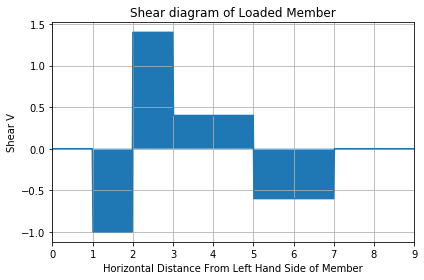

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,V)
plt.xlabel("Horizontal Distance From Left Hand Side of Member")
plt.ylabel("Shear V")
plt.title("Shear diagram of Loaded Member")
plt.xlim([0, lt])
plt.fill_between(X,V,0)
plt.grid(True)
plt.tight_layout()
plt.show()

Note: One might notice that the change in shear between thwo points tend to have a sight curve such as from x=0.9 to x=1. This is directly related to the number of values used in the ```np.linspace()``` function. Simply usinig more data points will result in a more standard shear diagram

### Moment Diagram
The same procedure will be used to create the moment digram for our loaded member. First we must create an array with the moments in small increments along our member. This loop is simply calculating the moment my multiplying the load by the distance it is acting upon but doing it in small enough increments that we can plot

In [8]:
M = np.zeros(X.size) 
for i,x in enumerate(X):
    m = 0                   
    for p in loads_sort:        
        if p[0]<x:          
            m += p[1]*(x-p[0])  
    M[i]=m          

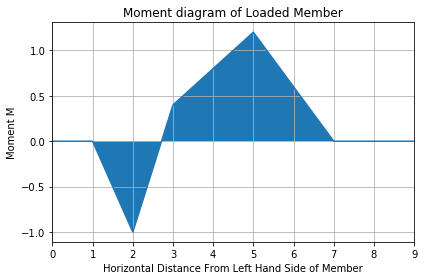

In [9]:
plt.plot(X,M)
plt.xlabel("Horizontal Distance From Left Hand Side of Member")
plt.ylabel("Moment M")
plt.title("Moment diagram of Loaded Member")
plt.xlim([0, lt])
plt.fill_between(X,M,0)
plt.grid(True)
plt.tight_layout()
plt.show()

### TIme to Combine!
Now that we have all the seperate parts functioning, I will put them all together in a function in order to make everybodys life easier

In [13]:
def shear_moment_diagram():
    a=int(input('What is the distance between the end of the beam and the first support: '))
    l=int(input('What is the distance between the two supports: '))
    b=int(input('What is the distence between the second support and the far end of the beam: '))
    print(' ')
    lt=a+b+l
    
    n=int(input('How many point loads are applied to this beam: '))
    print(' ')
    ydirect=[]
    loads=np.zeros((n,2))
    for i in range(n):
        d = float(input(f"What is the distance of load {i+1} from the left hand side of the beam: "))
        p = float(input(f"What is the magnitude of load {i+1}: "))
        print(' ')
        loads[i][0]=d
        loads[i][1]=p
        ydirect.append(p)
    
    moment=[]
    for i in range(n):
        dist=loads[i][0]
        force=loads[i][1]
        length=dist-a
        m=length*force
        moment.append(m)
    Ma=sum(moment)
    rb=Ma/l
    sum_loads=sum(ydirect)
    ra=sum_loads-rb
    
    loads[:,1]*=-1
    loads=np.append(loads,[[a,ra],[a+l,rb]],axis=0)
    loads_sort=loads[loads[:,0].argsort()]
    loads_sort
    
    X = np.linspace(0,lt,1000)    
    V = np.zeros(X.size)         
    for i,x in enumerate(X):     
        v = 0                   
        for p in loads_sort:         
            if p[0]<x:          
                v+=p[1]         
        V[i]=v  
        
    M = np.zeros(X.size) 
    for i,x in enumerate(X):
        m = 0                   
        for p in loads_sort:        
            if p[0]<x:          
                m += p[1]*(x-p[0])  
        M[i]=m              
        
        
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(X,V)
    plt.xlabel("Horizontal Distance From Left Hand Side of Member")
    plt.ylabel("Shear V")
    plt.title("Shear diagram of Loaded Member")
    plt.xlim([0, lt])
    plt.fill_between(X,V,0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f'The largest absolute shear value is {np.round(max(abs(V)),4)}')
    
    plt.plot(X,M)
    plt.xlabel("Horizontal Distance From Left Hand Side of Member")
    plt.ylabel("Moment M")
    plt.title("Moment diagram of Loaded Member")
    plt.xlim([0, lt])
    plt.fill_between(X,M,0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f'The largest absolut moment is {np.round(max(abs(M)),4)}')

Testing the new funtion with the values from the example above since we already know what it should look like

What is the distance between the end of the beam and the first support: 2
What is the distance between the two supports: 5
What is the distence between the second support and the far end of the beam: 2
 
How many point loads are applied to this beam: 3
 
What is the distance of load 1 from the left hand side of the beam: 1
What is the magnitude of load 1: 1
 
What is the distance of load 2 from the left hand side of the beam: 3
What is the magnitude of load 2: 1
 
What is the distance of load 3 from the left hand side of the beam: 5
What is the magnitude of load 3: 1
 


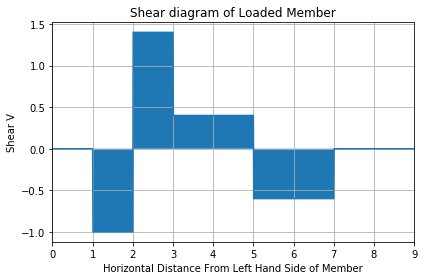

The largest absolute shear value is 1.4


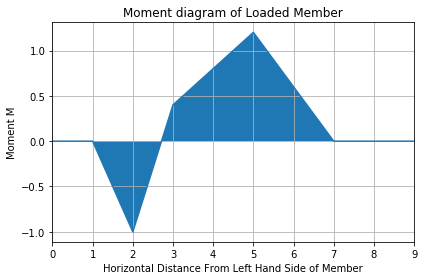

The largest absolut moment is 1.2


In [14]:
shear_moment_diagram()

It works :)

### Solving problems 5.18, 5.21, 5.25

### 5.18
For the beam and loading shown, determine the maximum normal
stress due to bending on section a-a.

![title](img/5.18pic.png)

What is the distance between the end of the beam and the first support: 0
What is the distance between the two supports: 4
What is the distence between the second support and the far end of the beam: 0
 
How many point loads are applied to this beam: 4
 
What is the distance of load 1 from the left hand side of the beam: 0.8
What is the magnitude of load 1: 30
 
What is the distance of load 2 from the left hand side of the beam: 1.6
What is the magnitude of load 2: 50
 
What is the distance of load 3 from the left hand side of the beam: 2.4
What is the magnitude of load 3: 50
 
What is the distance of load 4 from the left hand side of the beam: 3.2
What is the magnitude of load 4: 30
 


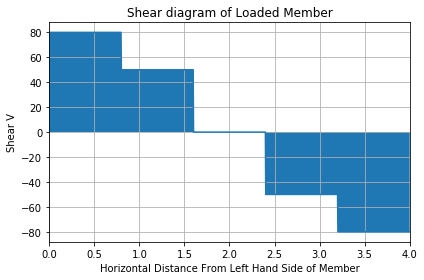

The largest absolute shear value is 80.0


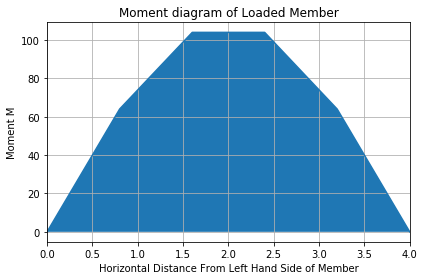

The largest absolut moment is 104.0


In [15]:
shear_moment_diagram()

Using the equation ```stress=M/S``` where ```M``` is the moment, which we have just found, and ```S``` is the section modulous. S can be found in a table and for this W310x52 beam it happens to be 747x10^3 mm^3. Also paying attentiont to units since we enterd KiloNewtons and meters into our function, our ```M``` values should have units of KN * M. Solving for max stress gives us

In [30]:
S=747*10**-6
stress=(104.0*10**3/S)/10**6     #Dividing by 10^6 to get an answer in an appropriate order of magnitude
print(f'The max stress in the cross-section n-n is {np.round(stress,2)} MPa')

The max stress in the cross-section n-n is 139.22 MPa


### 5.21
Draw the shear and bending-moment diagrams for the beam and
loading shown and determine the maximum normal stress due
to bending.

![title](img/5.21pic.png)

What is the distance between the end of the beam and the first support: 1
What is the distance between the two supports: 10
What is the distence between the second support and the far end of the beam: 0
 
How many point loads are applied to this beam: 3
 
What is the distance of load 1 from the left hand side of the beam: 0
What is the magnitude of load 1: 25
 
What is the distance of load 2 from the left hand side of the beam: 3
What is the magnitude of load 2: 25
 
What is the distance of load 3 from the left hand side of the beam: 9
What is the magnitude of load 3: 25
 


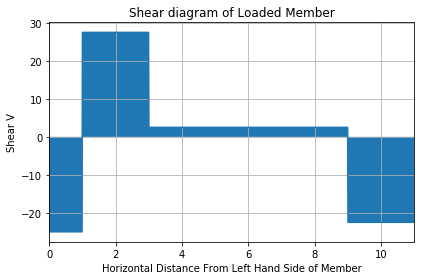

The largest absolute shear value is 27.5


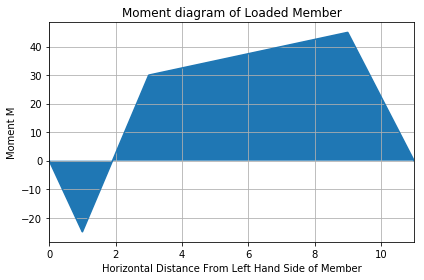

The largest absolut moment is 44.99


In [21]:
shear_moment_diagram()

Using the equation ```stress=M/S``` where ```M``` is the moment, which we have just found, and ```S``` is the section modulous. S can be found in a table and for this S12x35 beam it happens to be 38.1 in^3. Also paying attentiont to units since we enterd KiloPounds and feet into our function, our ```M``` values should have units of Kips * ft. Solving for max stress gives us

In [29]:
S=38.1
stress=(44.99*12/S)    # Multiplying by 12 to get Kip*ft to kip*in
print(f'The max normal stress in the beam due to bending is {np.round(stress,2)} Ksi')

The max normal stress in the beam due to bending is 14.17 Ksi


### 5.25
Draw the shear and bending-moment diagrams for the
beam and loading shown and determine the maximum normal
stress due to bending.

![title](img/5.25pic.png)

What is the distance between the end of the beam and the first support: 5
What is the distance between the two supports: 13
What is the distence between the second support and the far end of the beam: 0
 
How many point loads are applied to this beam: 2
 
What is the distance of load 1 from the left hand side of the beam: 0
What is the magnitude of load 1: 5
 
What is the distance of load 2 from the left hand side of the beam: 13
What is the magnitude of load 2: 10
 


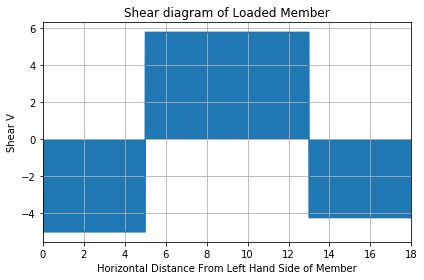

The largest absolute shear value is 5.7692


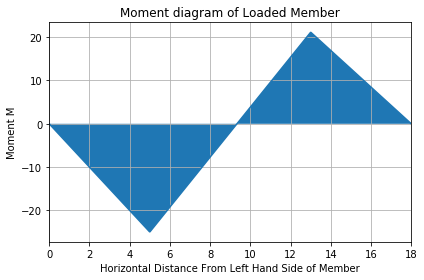

The largest absolut moment is 24.955


In [27]:
shear_moment_diagram()

Using the equation ```stress=M/S``` where ```M``` is the moment, which we have just found, and ```S``` is the section modulous. S can be found in a table and for this W14x22 beam it happens to be 29 in^3. Also paying attentiont to units since we enterd KiloPounds and feet into our function, our ```M``` values should have units of Kips * ft. Solving for max stress gives us

In [28]:
S=29
stress=(24.955*12/S)    # Multiplying by 12 to get Kip*ft to kip*in
print(f'The max normal stress in the beam due to bending is {np.round(stress,2)} Ksi')

The max normal stress in the beam due to bending is 10.33 Ksi
